In [41]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
#from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA  import get_config
#from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config
from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt_FULLDATA import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [43]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Hermite/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Hermite/BiPot/


In [44]:
for f in os.listdir(hermite_dir):
    assert "1024NPath" not in f
    assert "Diff" not in f
    if "T_MSEs" in f:
        print(f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

Hermite_fBiPot_DriftEvalExp_10240NPaths_3906e-03dT_MSEs.parquet


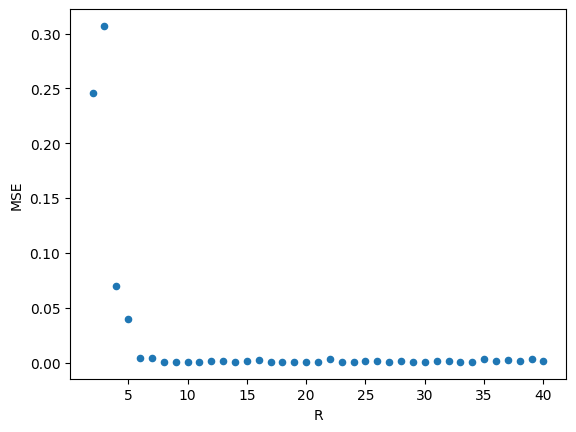

In [45]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [46]:
print(mse)
R = mse.dropna().iloc[np.argmin(mse.dropna().values.flatten())]
print("\n")
print(R)

              0
index          
2      0.245360
3      0.306926
4      0.070059
5      0.039962
6      0.003862
7      0.003886
8      0.000655
9      0.000673
10     0.000643
11     0.000670
12     0.001476
13     0.001081
14     0.000661
15     0.001243
16     0.002135
17     0.000842
18     0.000614
19     0.000790
20     0.000826
21     0.000752
22     0.003519
23     0.000758
24     0.000895
25     0.001086
26     0.001196
27     0.000872
28     0.001116
29     0.000880
30     0.000767
31     0.001142
32     0.001720
33     0.000826
34     0.000940
35     0.002831
36     0.001444
37     0.002109
38     0.001504
39     0.003111
40     0.001670


0    0.000614
Name: 18, dtype: float64


In [47]:
try:
    R = R.name
except AttributeError:
    pass
num_paths = 10240
save_path = hermite_dir + f"Hermite_f{diradd}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

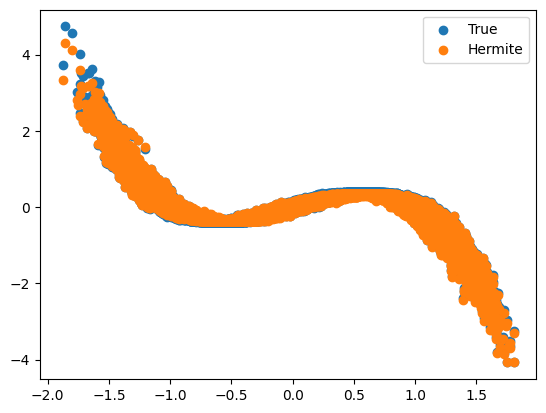

In [48]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Hermite")
plt.legend()
plt.show()